# Chapter 4 - Exercises

## Set Up

### Packages

In [1]:
import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
from scipy import stats
from scipy.interpolate import BSpline
from sklearn.preprocessing import StandardScaler

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Defaults

In [2]:
# seaborn defaults
sns.set(
    style="whitegrid",
    font_scale=1.2,
    rc={
        "axes.edgecolor": "0",
        "axes.grid.which": "both",
        "axes.labelcolor": "0",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "xtick.bottom": True,
        "ytick.left": True,
    },
)

colors = sns.color_palette()

### Constants

In [3]:
DATA_DIR = "../data"
HOWELL_FILE = "howell.csv"
CHERRY_BLOSSOMS_FILE = "cherry_blossoms.csv"

RANDOM_SEED = 42

In [4]:
def load_data(file_name, data_dir=DATA_DIR, **kwargs):
    path = os.path.join(data_dir, file_name)
    return pd.read_csv(path, **kwargs)

## Easy

### 4E1

In the model definition below, which line is the likelihood?

\begin{align}
    y_i & \sim \text{Normal}\left( \mu, \sigma\right) \\
    \mu & \sim \text{Normal}\left( 0, 10\right) \\
    \sigma & \sim \text{Exponential}\left( 1\right).
\end{align}

---

The first line.

### 4E2

In the model definition just above, how many parameters are in the posterior distribution.

---

Two: $\mu$ and $\sigma$.

### 4E3

Using the model definition above, write down the appropriate form of Bayes' theorem that includes the proper likelihood and priors.

---

\begin{equation}
    \text{P}(\mu, \sigma \mid y) = \frac{
        \prod_i \text{Normal}(y_i\mid \mu, \sigma) ~\text{Normal}(\mu \mid 0, 10) ~\text{Exponential}(\sigma \mid 1)
    }{
        \int\int \prod_i \text{Normal}(y_i\mid\mu, \sigma) ~\text{Normal}(\mu \mid 0, 10) ~\text{Exponential}(\sigma \mid 1) \,\mathrm{d}\mu \,\mathrm{d}\sigma 
    }
\end{equation}

### 4E4

In the model definition below, which line is the linear model?

\begin{align}
    y_i & \sim \text{Normal}(\mu, \sigma) \\
    \mu_i & = \alpha + \beta x_i \\
    \alpha & \sim \text{Normal}(0, 10) \\
    \beta & \sim \text{Normal}(0, 1) \\
    \sigma & \sim \text{Exponential}(2) \\
\end{align}

---

The second.

### 4E5

In the model definition just above, how many parameters are in the posterior distribution?

---

Three.

## Medium

### 4M1

For the model definition below, simulate observed $y$ values from the prior (not the posterior).

\begin{align}
    y_i & \sim \text{Normal}\left( \mu, \sigma\right) \\
    \mu & \sim \text{Normal}\left( 0, 10\right) \\
    \sigma & \sim \text{Exponential}\left( 1\right).
\end{align}

---

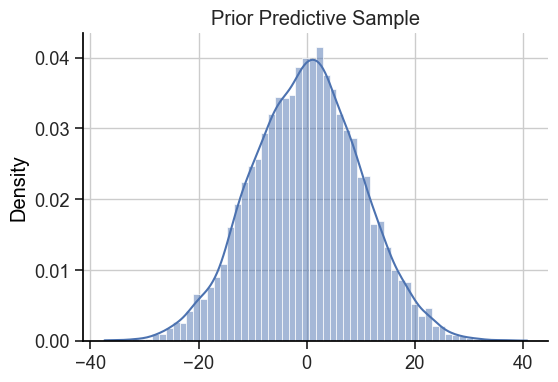

In [5]:
n_sample = 10000

# priors
mu_prior = stats.norm(loc=0, scale=10)
lam = 1
sigma_prior = stats.expon(scale=1 / lam)

# sample priors
mu_sample = mu_prior.rvs(n_sample)
sigma_sample = sigma_prior.rvs(n_sample)

# sample likelihood
prior_pred_sample = stats.norm.rvs(loc=mu_sample, scale=sigma_sample, size=n_sample)

# plot distribution
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(prior_pred_sample, stat="density", kde=True, ax=ax)

ax.set(title="Prior Predictive Sample");

### 4M2

Translate the model just above into a quap formula.

---

Skipped, not relevant in Python.

### 4M3

Translate the quap model formula below into a mathematical model definition.

```
y ~ dnorm( mu , sigma ),
mu <- a + b*x,
a ~ dnorm( 0 , 10 ),
b ~ dunif( 0 , 1 ),
sigma ~ dexp( 1 )
```

---

I assume that this means

\begin{align}
    y_i & \sim \text{Normal}(\mu, \sigma) \\
    \mu_i & = \alpha + \beta x_i \\
    \alpha & \sim \text{Normal}(0, 10) \\
    \beta & \sim \text{Normal}(0, 1) \\
    \sigma & \sim \text{Exponential}(1). \\
\end{align}

### 4M4

A sample of students is measured for height each year for 3 years.
After the third year, you want to fit a linear regression predicting height using year as a predictor.
Write down the mathematical model definition for this regression, using any variable names and priors you choose.
Be prepared to defend your choice of priors.

---

Using $h$ to denote height and $t$ to denote years since first measurement, I would use the following model:

\begin{align}
    h_i & \sim \text{Normal}(\mu, \sigma) \\
    \mu_i & = \alpha + \beta t_i \\
    \alpha & \sim \text{Normal}(130, 20) \\
    \beta & \sim \text{Normal}(6, 3) \\
    \sigma & \sim \text{Exponential}(0.2). \\
\end{align}

Now we justify our priors. First let's define them.

In [6]:
# priors
alpha_prior = stats.norm(loc=130, scale=20)
beta_prior = stats.norm(loc=6, scale=3)
lam = 0.2
sigma_prior = stats.expon(scale=1 / lam)

First just plot the priors. Note that
- $\alpha$ represents the mean height in the first year
- $\beta$ represents the mean yearly change
- $\sigma$ represents the standard deviation between students in a given year

In [7]:
def plot_child_height_against_time_priors(
    alpha_prior, beta_prior, sigma_prior, n_sample
):
    # sample priors for plot
    alpha_sample = alpha_prior.rvs(n_sample)
    beta_sample = beta_prior.rvs(n_sample)
    sigma_sample = sigma_prior.rvs(n_sample)

    # plot priors
    fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

    sns.histplot(alpha_sample, stat="density", kde=True, ax=axs[0])
    axs[0].set(
        xlabel="Height (cm)",
        title="alpha",
    )
    sns.histplot(beta_sample, stat="density", kde=True, ax=axs[1])
    axs[1].set(
        xlabel="Height change (cm)",
        ylabel=None,
        title="beta",
    )
    sns.histplot(sigma_sample, stat="density", kde=True, ax=axs[2])
    axs[2].set(
        xlabel="Height(cm)",
        ylabel=None,
        title="sigma",
    )

    fig.suptitle("Priors")

    return fig, axs

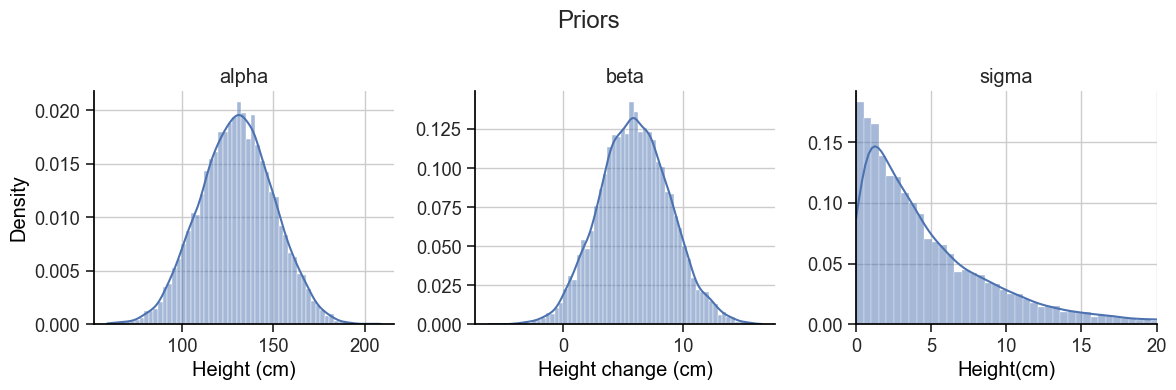

In [8]:
fig, axs = plot_child_height_against_time_priors(
    alpha_prior, beta_prior, sigma_prior, n_sample=10000
)

axs[2].set(xlim=[0, 20])
plt.tight_layout()

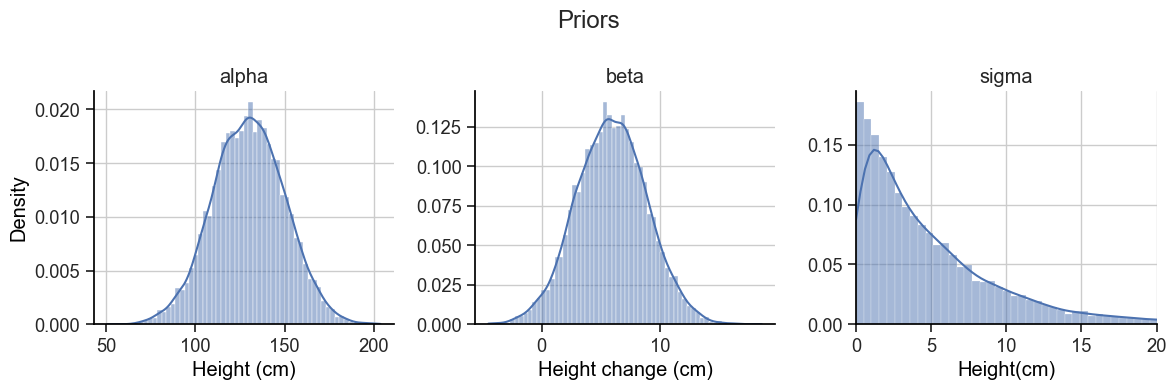

In [9]:
n_sample = 10000

# sample priors for plot
alpha_sample = alpha_prior.rvs(n_sample)
beta_sample = beta_prior.rvs(n_sample)
sigma_sample = sigma_prior.rvs(n_sample)

# plot priors
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(alpha_sample, stat="density", kde=True, ax=axs[0])
axs[0].set(
    xlabel="Height (cm)",
    title="alpha",
)
sns.histplot(beta_sample, stat="density", kde=True, ax=axs[1])
axs[1].set(
    xlabel="Height change (cm)",
    ylabel=None,
    title="beta",
)
sns.histplot(sigma_sample, stat="density", kde=True, ax=axs[2])
axs[2].set(
    xlim=[0, 20],
    xlabel="Height(cm)",
    ylabel=None,
    title="sigma",
)

fig.suptitle("Priors")
plt.tight_layout();

These seem reasonable to me:
- We don't know what age the students are but between ages 5 - 16 the mean height of children can vary between 100 and 170 cm
- Height will generally increase by 5-8cm per year during childhood
- Height can reasonably vary between children by 5-10cm.

As a final check we sample the priors and generate a prior predictive distribution for $\mu$. Note that this is the mean by year, and doesn't take the variation due to $\sigma$ into account.

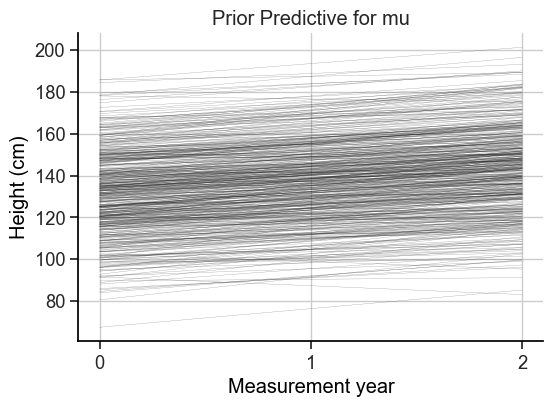

In [10]:
n_sample = 500

# sample priors
alpha_sample = alpha_prior.rvs(n_sample)
beta_sample = beta_prior.rvs(n_sample)

t = np.arange(3)
mu_sample = np.array([alpha_sample + beta_sample * year for year in t])

# plot lines
fig, ax = plt.subplots(figsize=(6, 4))

for sample in range(n_sample):
    ax.plot(t, mu_sample[:, sample], color="k", lw=0.2, alpha=0.5)

ax.set(
    xticks=[0, 1, 2],
    # xticklabels=[0, 1, 2],
    xlabel="Measurement year",
    ylabel="Height (cm)",
    title="Prior Predictive for mu",
);

### 4M5

Now suppose I remind you that every student got taller each year. 
Does this information lead you to change your choice of priors?
How?

---

The prior for beta already had very few negative values, but we could force it to be positive using a gamma distribution.

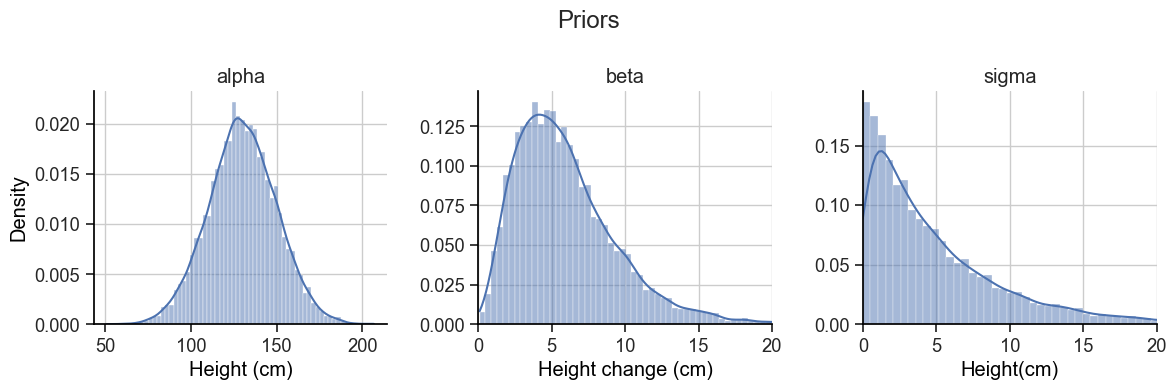

In [11]:
beta_prior = stats.gamma(a=3, scale=2)

fig, axs = plot_child_height_against_time_priors(
    alpha_prior, beta_prior, sigma_prior, n_sample=10000
)

axs[1].set(xlim=[0, 20])
axs[2].set(xlim=[0, 20])
plt.tight_layout()

### 4M6

Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm.
How does this lead you to revise your priors?

---

If variance is less than 64 then standard deviation is less than 8. We could use this to tighten the prior on sigma a little.

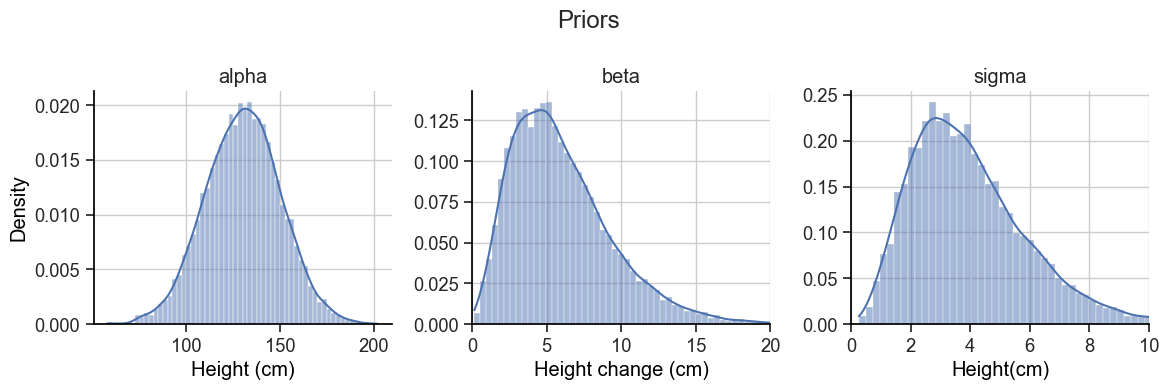

In [12]:
beta_prior = stats.gamma(a=3, scale=2)
sigma_prior = stats.gamma(a=4, scale=1)

fig, axs = plot_child_height_against_time_priors(
    alpha_prior, beta_prior, sigma_prior, n_sample=10000
)

axs[1].set(xlim=[0, 20])
axs[2].set(xlim=[0, 10])
plt.tight_layout()

There is still some density above 8 but not very much.

### 4M7

Refit model `m4.3` from the chapter, but omit the mean weight `xbar` this time.
Compare the new model’s posterior to that of the original model.
In particular, look at the covariance among the parameters.
What is different?
Then compare the posterior predictions of both models.

---

In [13]:
# reload the data
howell = load_data(HOWELL_FILE, delimiter=";")
adult = howell.loc[howell["age"] >= 18, :]

First we respecify the original model:

In [14]:
with pm.Model() as m4_3:
    # priors
    alpha = pm.Normal("alpha", mu=178, sigma=20)
    beta = pm.LogNormal("beta", mu=0, sigma=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)

    # data
    weight = pm.MutableData("weight", adult.weight)

    # deterministic
    mu = pm.Deterministic("mu", alpha + beta * (weight - weight.mean()))

    # observed
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=adult.height)

    # sample posterior
    trace_4_3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Now repeat without centring around the mean:

In [15]:
with pm.Model() as m4_3a:
    # priors
    alpha = pm.Normal("alpha", mu=178, sigma=20)
    beta = pm.LogNormal("beta", mu=0, sigma=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)

    # data
    weight = pm.MutableData("weight", adult.weight)

    # deterministic
    mu = pm.Deterministic("mu", alpha + beta * weight)

    # observed
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=adult.height)

    # sample posterior
    trace_4_3a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


First compare the posteriors

In [16]:
az.summary(
    trace_4_3,
    var_names=["alpha", "beta", "sigma"],
    kind="stats",
    hdi_prob=0.89,
    round_to=2,
)

mean    sd  hdi_5.5%  hdi_94.5%
alpha  154.6  0.27    154.19     155.04
beta     0.9  0.04      0.84       0.97
sigma    5.1  0.19      4.80       5.41

In [17]:
az.summary(
    trace_4_3a,
    var_names=["alpha", "beta", "sigma"],
    kind="stats",
    hdi_prob=0.89,
    round_to=2,
)

mean    sd  hdi_5.5%  hdi_94.5%
alpha  114.53  1.98    111.47     117.77
beta     0.89  0.04      0.82       0.96
sigma    5.11  0.20      4.81       5.43

The mean of alpha is shifted down by 40 and it has much higher standard deviation.
Note that previously alpha represented the height at mean weight, but represents mean height at weight zero.
Since we have no data near weight zero, it makes sense that the uncertainty in alpha is now much higher.

Now let's compare the covariances.

In [18]:
trace_df = trace_4_3.posterior.drop("mu").mean(dim=["mu_dim_0"]).to_dataframe()
trace_df.cov().round(3)

alpha   beta  sigma
alpha  0.072 -0.000  0.000
beta  -0.000  0.002 -0.000
sigma  0.000 -0.000  0.037

In [19]:
trace_df = trace_4_3a.posterior.drop("mu").mean(dim=["mu_dim_0"]).to_dataframe()
trace_df.cov().round(3)

alpha   beta  sigma
alpha  3.928 -0.086  0.001
beta  -0.086  0.002  0.000
sigma  0.001  0.000  0.038

The big difference here is that there are more significant off-diagonal entries.
Previously alpha and beta were uncorrelated, but now they are significantly correlated.

In [20]:
def plot_posterior_compatibility_interval_for_linear_height_model(
    trace, post_pred_sample, adult, ax=None
):
    mu_mean = trace.posterior.mu.mean(dim=["chain", "draw"])
    mu_hdi = az.hdi(trace.posterior.mu, hdi_prob=0.89)
    mu_plot_data = pd.DataFrame(
        {
            "weight": trace.constant_data.weight,
            "mean": mu_mean,
            "hdi_lower": mu_hdi.mu.sel(hdi="lower"),
            "hdi_higher": mu_hdi.mu.sel(hdi="higher"),
        }
    ).sort_values("weight")

    height_hdi = az.hdi(post_pred_sample.posterior_predictive.height, hdi_prob=0.89)
    post_pred_plot_data = pd.DataFrame(
        {
            "weight": trace.constant_data.weight,
            "hdi_lower": height_hdi.height.sel(hdi="lower"),
            "hdi_higher": height_hdi.height.sel(hdi="higher"),
        }
    ).sort_values("weight")

    if not ax:
        fig, ax = plt.subplots(figsize=(6, 5))

    # plot true data
    sns.scatterplot(adult, x="weight", y="height", ax=ax)

    # plot the mean at each weight
    ax.plot(mu_plot_data["weight"], mu_plot_data["mean"], color="k")

    # mu HDI
    ax.fill_between(
        mu_plot_data["weight"],
        mu_plot_data["hdi_lower"],
        mu_plot_data["hdi_higher"],
        color="k",
        alpha=0.3,
    )

    # posterior predictive HDI
    ax.fill_between(
        post_pred_plot_data["weight"],
        post_pred_plot_data["hdi_lower"],
        post_pred_plot_data["hdi_higher"],
        color="k",
        alpha=0.1,
    )

    ax.set(title="Posterior compatibility interval")

In [21]:
with m4_3:
    post_pred_sample_4_3 = pm.sample_posterior_predictive(trace_4_3a)

with m4_3a:
    post_pred_sample_4_3a = pm.sample_posterior_predictive(trace_4_3a)

Sampling: [height]


Sampling: [height]


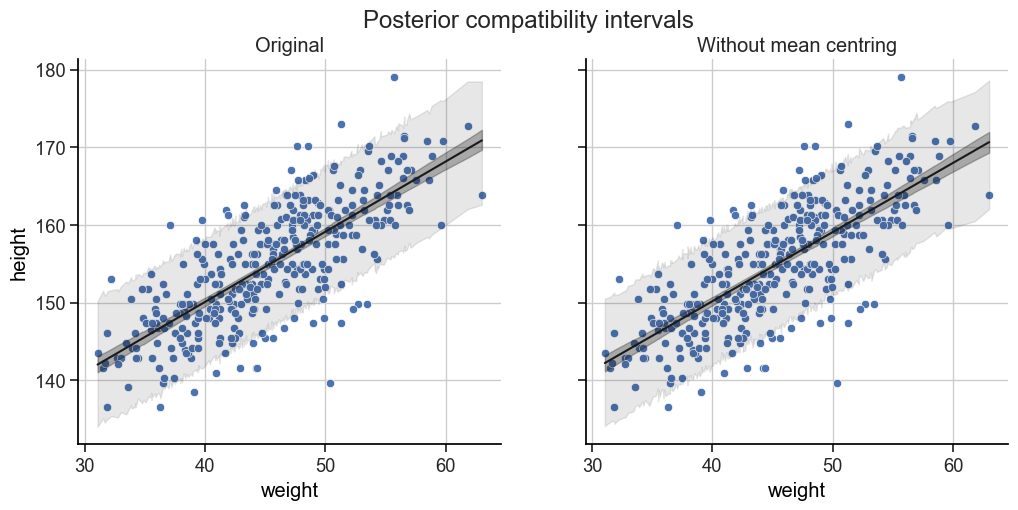

In [22]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

plot_posterior_compatibility_interval_for_linear_height_model(
    trace_4_3, post_pred_sample_4_3, adult, ax=axs[0]
)
plot_posterior_compatibility_interval_for_linear_height_model(
    trace_4_3a, post_pred_sample_4_3a, adult, ax=axs[1]
)

axs[0].set_title("Original")
axs[1].set_title("Without mean centring")

fig.suptitle("Posterior compatibility intervals");

The posterior predictions appear to be identical.

### 4M8

In the chapter, we used 15 knots with the cherry blossom spline.
Increase the number of knots and observe what happens to the resulting spline.
Then adjust also the width of the prior on the weights—change the standard deviation of the prior and watch what happens.
What do you think the combination of knot number and the prior on the weights controls?

---

Start by reloading the data and redefining the necessary functions

In [32]:
cherry = load_data(CHERRY_BLOSSOMS_FILE)

# drop rows missing doy data
cherry = cherry.dropna(subset=["doy"])

In [33]:
def generate_design_matrix(cherry, n_knots, deg):
    knots = np.quantile(cherry.year, np.linspace(0, 1, n_knots))

    # add additional endpoint control knots - deg at each endpoint
    start_knots = np.array([cherry.year.min()] * deg)
    end_knots = np.array([cherry.year.max()] * deg)
    knots_ext = np.concatenate([start_knots, knots, end_knots])

    # this brings total knots to n_knots + 2 * deg, so we will have
    n_basis = n_knots + deg - 1

    # use arbitrary weights to start
    splines = BSpline(knots_ext, np.ones(n_basis), deg)

    # design matrix is basis splines evaluated at given points
    design_matrix = splines.design_matrix(
        cherry.year, knots_ext, deg, extrapolate=True
    ).toarray()

    return design_matrix, knots

In [34]:
def plot_basis_splines(cherry, design_matrix, knots, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 3))

    # plot the basis splines
    n_basis = design_matrix.shape[1]
    for i in range(n_basis):
        ax.plot(cherry.year, design_matrix[:, i])

    # plot the knots
    for knot in knots:
        ax.axvline(knot, ls="--", color="k", alpha=0.5)

    ax.set(
        xlabel="year",
        ylabel="basis value",
        title="Basis Splines",
    )

In [35]:
def define_linear_spline_model(cherry, design_matrix, beta_prior_sigma=10):
    n_basis = design_matrix.shape[1]

    with pm.Model() as model:
        # priors
        alpha = pm.Normal("alpha", mu=100, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=beta_prior_sigma, shape=n_basis)
        sigma = pm.Exponential("sigma", lam=1)

        # data
        year = pm.MutableData("year", cherry.year)
        year_splines = pm.MutableData(
            "year_splines", design_matrix
        )  # shape is inferred

        # deterministic
        mu = pm.Deterministic("mu", alpha + year_splines @ beta)

        # observed
        doy = pm.Normal("doy", mu=mu, sigma=sigma, observed=cherry.doy)

    return model

In [36]:
def plot_weighted_splines(model, cherry, knots, ax=None):
    with model:
        trace = pm.sample(1000)
        map = pm.find_MAP()

    if not ax:
        fig, ax = plt.subplots(figsize=(10, 3))

    # plot each of the weighted basis splines
    weighted_splines = trace.constant_data["year_splines"].values * map["beta"]
    n_basis = weighted_splines.shape[1]
    for i in range(n_basis):
        ax.plot(cherry.year, weighted_splines[:, i])

    # plot the knot locations
    for knot in knots:
        ax.axvline(knot, ls="--", color="k", alpha=0.5)

    # plot the combination of them all
    ax.plot(cherry.year, weighted_splines.sum(axis=1), color="k")

    ax.set(
        xlabel="year",
        ylabel="basis * weight",
        title="Weighted basis splines",
    )

    return trace

In [37]:
def plot_splines_mean_and_posterior_hdi(trace, cherry, hdi_prob=0.89, ax=None):
    mu_mean = trace.posterior.mu.mean(dim=["chain", "draw"])
    mu_hdi = az.hdi(trace.posterior.mu, hdi_prob=0.89)

    mu_plot_data = pd.DataFrame(
        {
            "year": trace.constant_data.year,
            "mean": mu_mean,
            "hdi_lower": mu_hdi.mu.sel(hdi="lower"),
            "hdi_higher": mu_hdi.mu.sel(hdi="higher"),
        }
    ).sort_values("year")

    if not ax:
        fig, ax = plt.subplots(figsize=(10, 4))

    # plot true data
    sns.scatterplot(cherry, x="year", y="doy", ax=ax)

    # plot the mean estimates
    ax.plot(mu_plot_data["year"], mu_plot_data["mean"], color="k")

    # posterior HDI
    ax.fill_between(
        mu_plot_data["year"],
        mu_plot_data["hdi_lower"],
        mu_plot_data["hdi_higher"],
        color="k",
        alpha=0.5,
    )

    ax.set(ylabel="Day of year", title="Day of first cherry blossom");

In [38]:
def fit_and_plot_spline_model(cherry, n_knots, deg, beta_prior_sigma=10):
    fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(9, 9))

    design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
    plot_basis_splines(cherry, design_matrix, knots, ax=axs[0])

    # get the model
    model = define_linear_spline_model(cherry, design_matrix, beta_prior_sigma)
    trace = plot_weighted_splines(model, cherry, knots, ax=axs[1])

    # plot the predictions
    plot_splines_mean_and_posterior_hdi(trace, cherry, ax=axs[2])

    for ax in axs:
        ax.set(xlabel=None, title=None)

    axs[2].set(xlabel="year")

    fig.suptitle(f"Degree {deg} basis splines with {n_knots} knots")
    plt.tight_layout()

    return model, trace

Now to the exercise.
I'll do it with some smaller knot values because mine runs so slowly for some reason.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


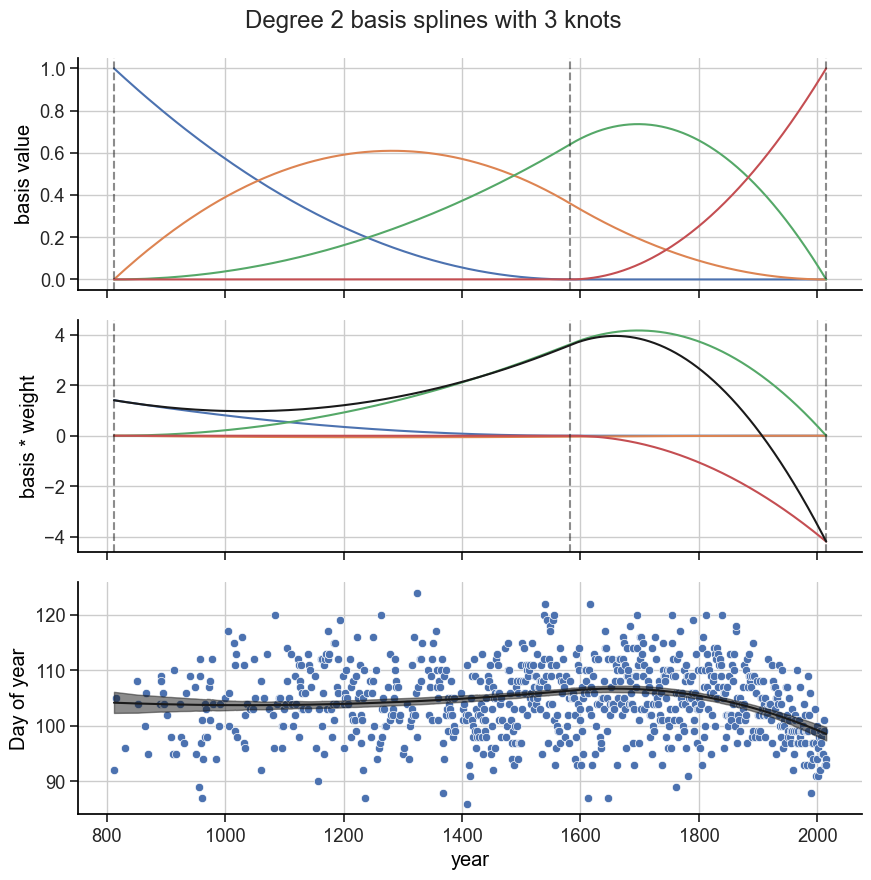

In [39]:
model, trace = fit_and_plot_spline_model(cherry, n_knots=3, deg=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


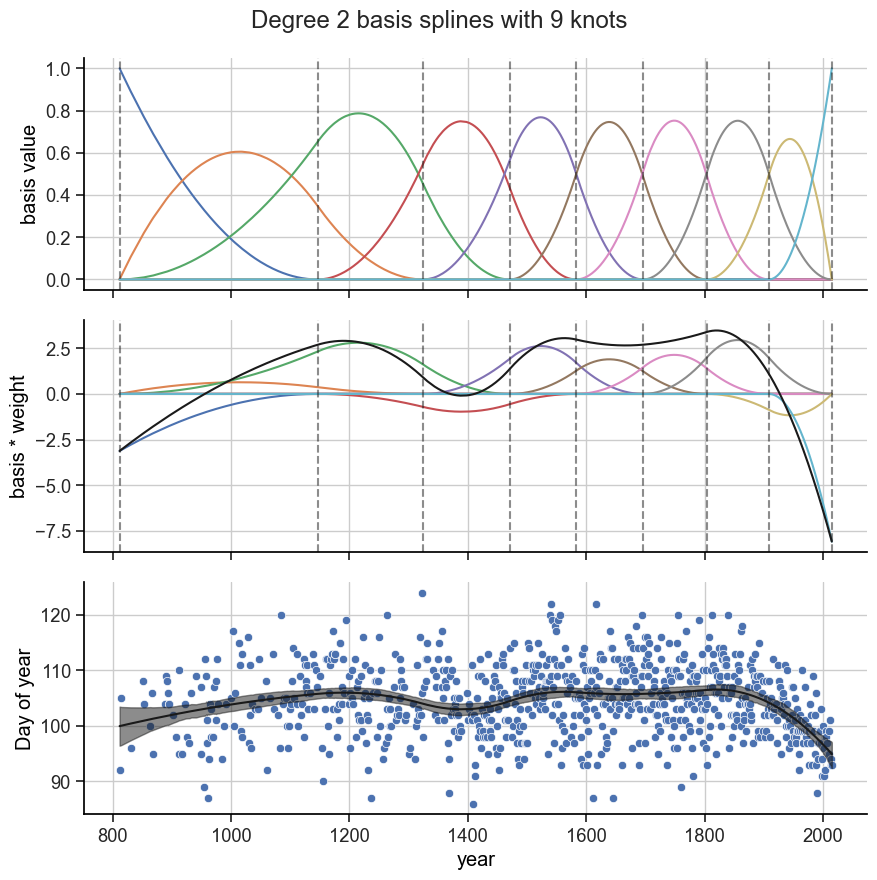

In [40]:
model, trace = fit_and_plot_spline_model(cherry, n_knots=9, deg=2)

You can see that adding more knots makes the resulting curve more flexible.

Now try a tighter prior on the standard deviation.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


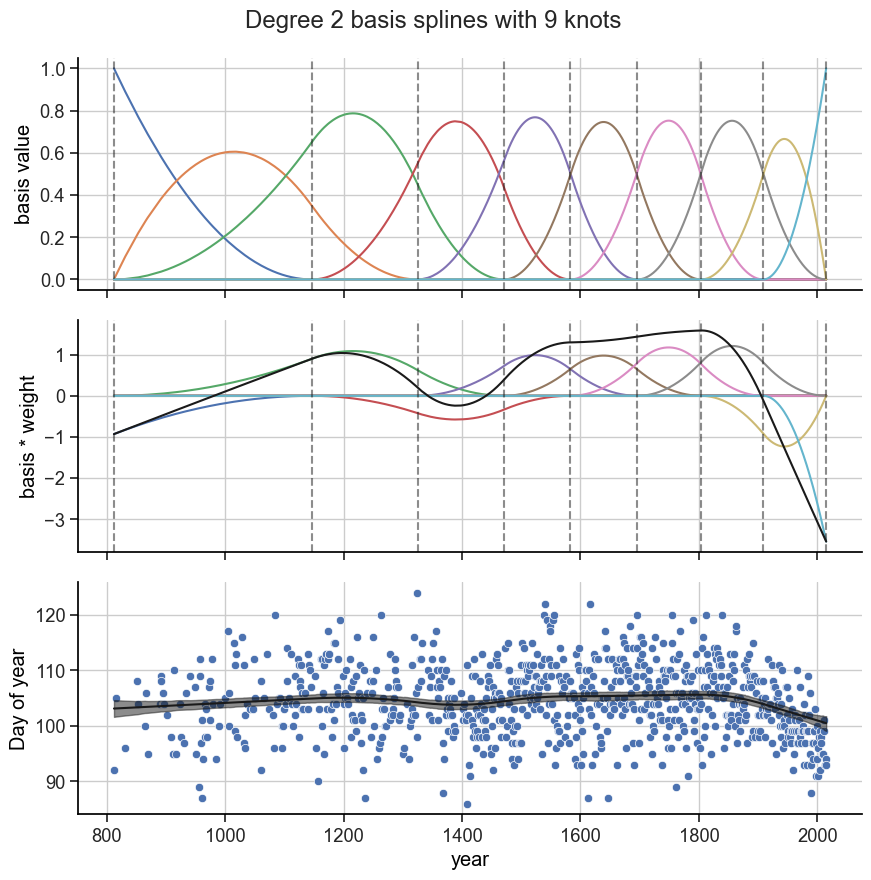

In [41]:
model, trace = fit_and_plot_spline_model(cherry, n_knots=9, deg=2, beta_prior_sigma=1)

With a tighter prior there is less flexibility in the curve.

## Hard

### 4H1

The weights listed below were recored in the !Kung census, but heights were not recorded for these individuals.
Provide predicted heights and 89% intervals for each of these individuals.
That is, fill in the table, below, using model-based predictions.

| Individual      | weight          | expected height | 89% interval    |
|-----------------|-----------------|-----------------|-----------------|
| 1               | 47.0            |                 |                 |
| 2               | 43.7            |                 |                 |
| 3               | 64.8            |                 |                 |
| 4               | 32.6            |                 |                 |
| 5               | 54.6            |                 |                 |

---

In [42]:
# reload the data
howell = load_data(HOWELL_FILE, delimiter=";")
adult = howell.loc[howell["age"] >= 18, :]

I will assume that these are adults and so use model 4.3.
First respecify the model.

Note: we need to specify that the dimensions for weight, mu, and height are the same to allow us to change the weight values for prediction.

In [43]:
with pm.Model() as m4_3:
    # priors
    alpha = pm.Normal("alpha", mu=178, sigma=20)
    beta = pm.LogNormal("beta", mu=0, sigma=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)

    # data
    weight = pm.MutableData("weight", adult.weight, dims="obs_id")

    # deterministic
    mean_weight = adult.weight.mean()
    mu = pm.Deterministic(
        "mu", alpha + beta * (weight - mean_weight.mean()), dims="obs_id"
    )

    # observed
    height = pm.Normal(
        "height", mu=mu, sigma=sigma, observed=adult.height, dims="obs_id"
    )

    # sample posterior
    trace_4_3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Now we generate posterior predictions using the new weight values

In [44]:
predictions = pd.DataFrame(
    {
        "individual": range(1, 6),
        "weight": [47.0, 43.7, 64.8, 32.6, 54.6],
    }
)

with m4_3:
    pm.set_data({"weight": predictions.weight})
    trace_4_3 = pm.sample_posterior_predictive(
        trace_4_3,
        var_names=["mu", "height"],
        extend_inferencedata=True,
        predictions=True,
    )

Sampling: [height]


The values are stored in 'predictions'

In [45]:
trace_4_3

Inference data with groups:
	> posterior
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

For expected height we take the mean value for mu

In [46]:
predictions["expected_height"] = trace_4_3.predictions.mu.mean(
    dim=["chain", "draw"]
).round(2)

To get the interval we take an HDI of the height values.

In [47]:
predictions[["interval_lower", "interval_higher"]] = az.hdi(
    trace_4_3.predictions.height, hdi_prob=0.89
).height.round(2)

In [48]:
predictions

individual  weight  expected_height  interval_lower  interval_higher
0           1    47.0           156.41          147.69           164.00
1           2    43.7           153.43          145.36           161.19
2           3    64.8           172.50          163.95           181.01
3           4    32.6           143.40          135.30           151.43
4           5    54.6           163.28          154.49           170.74

### 4H2

Select out all the rows in the Howell1 data with ages below 18 years of age.
If you do it right, you should end up with a new data frame with 192 rows in it.

(a) Fit a linear regression to these data, using `quap`.
Present and interpret the estimates.
For every 10 units of increase in weight, how much taller does the model predict a child gets?

(b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis.
Superimpose the MAP regression line and 89% interval for the mean.
Also superimpose the 89% interval for predicted heights.

(c) What aspects of the model fit concern you?
Describe the kinds of assumptions you would change, if any, to improve the model.
You don’t have to write any new code.
Just explain what the model appears to be doing a bad job of, and what you hypothesize would be a better model.

---

In [49]:
# reload the data
howell = load_data(HOWELL_FILE, delimiter=";")
child = howell.loc[howell["age"] < 18, :]
child.shape

(192, 4)

First select and plot priors

In [50]:
n_prior_samples = 1000

child_sorted = child.sort_values("weight")
with pm.Model() as m_4h2:
    # priors
    alpha = pm.Normal("alpha", mu=120, sigma=30)
    beta = pm.Gamma("beta", alpha=1, beta=0.5)
    sigma = pm.Exponential("sigma", lam=0.4)

    # data
    weight = pm.MutableData("weight", child_sorted.weight, dims="obs")

    # linear regression
    mu = pm.Deterministic("mu", alpha + beta * (weight - weight.mean()), dims="obs")

    # likelihood
    height = pm.Normal(
        "height", mu=mu, sigma=sigma, observed=child_sorted.height, dims="obs"
    )

    # sample prior
    trace_4h2 = pm.sample_prior_predictive(
        samples=n_prior_samples, random_seed=RANDOM_SEED
    )

Sampling: [alpha, beta, height, sigma]


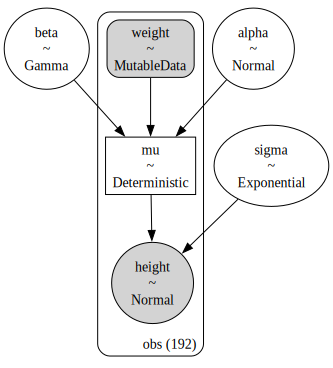

In [51]:
m_4h2.to_graphviz()

Plot priors

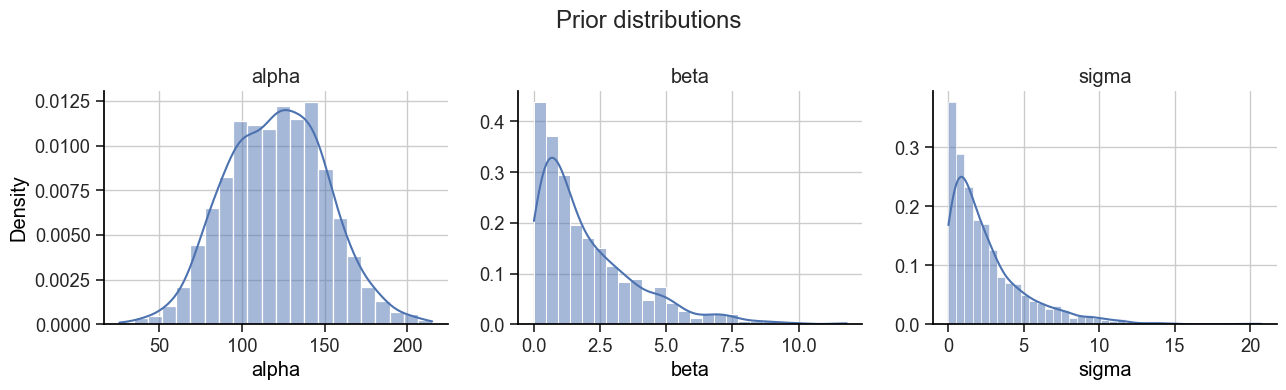

In [52]:
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))

params = ["alpha", "beta", "sigma"]
for param, ax in zip(params, axs):
    sns.histplot(trace_4h2.prior[param].sel(chain=0), stat="density", kde=True, ax=ax)
    ax.set(
        xlabel=param,
        ylabel=None,
        title=param,
    )

axs[0].set(ylabel="Density")
fig.suptitle("Prior distributions")
fig.tight_layout();

Plot sample lines

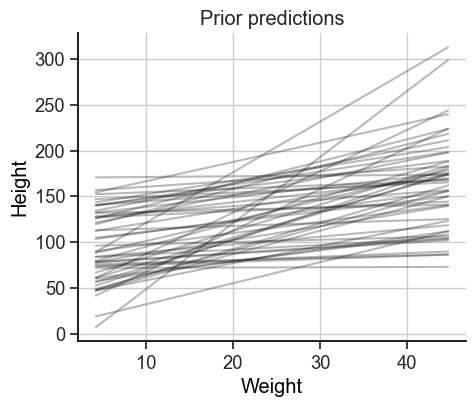

In [53]:
n_lines = 50

fig, ax = plt.subplots(figsize=(5, 4))

for draw in range(n_lines):
    ax.plot(
        trace_4h2.constant_data.weight,
        trace_4h2.prior.mu.sel(chain=0, draw=draw),
        color="k",
        alpha=0.3,
    )

ax.set(
    xlabel="Weight",
    ylabel="Height",
    title="Prior predictions",
);

Now we fit the model

In [54]:
draws = 1000
with m_4h2:
    trace_4h2 = pm.sample(draws=draws, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Summarise the posterior distributions

In [55]:
az.summary(
    trace_4h2,
    kind="stats",
    var_names="~mu",
    hdi_prob=0.89,
    round_to=2,
)

mean    sd  hdi_5.5%  hdi_94.5%
alpha  108.33  0.61    107.32     109.26
beta     2.72  0.07      2.61       2.82
sigma    8.45  0.44      7.79       9.19

The mean of $\beta$ is 2.7 which implies that an increase of 10 units in weight is associated with an increase of 27 units of height.

Now we plot the data against the MAP with HDIs. We need to sample the posterior predictive to get the HDI for height.

In [56]:
with m_4h2:
    trace_4h2 = pm.sample_posterior_predictive(
        trace_4h2,
        extend_inferencedata=True,
        random_seed=RANDOM_SEED,
    )
    map_vals = pm.find_MAP()

Sampling: [height]


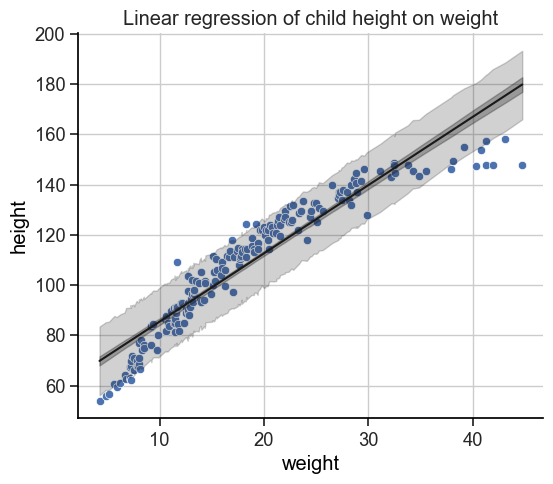

In [57]:
fig, ax = plt.subplots(figsize=(6, 5))

# true data
sns.scatterplot(
    x=trace_4h2.constant_data.weight, y=trace_4h2.observed_data.height, ax=ax
)

# plot MAP
ax.plot(
    trace_4h2.constant_data.weight,
    map_vals["mu"],
    color="k",
)

# plot 89% HDI for the mean
mu_hdi = az.hdi(trace_4h2.posterior.mu, hdi_prob=0.89)
ax.fill_between(
    trace_4h2.constant_data.weight,
    mu_hdi.mu.sel(hdi="lower"),
    mu_hdi.mu.sel(hdi="higher"),
    color="k",
    alpha=0.3,
)

# plot 89% HDI for predicted heights
height_hdi = az.hdi(trace_4h2.posterior_predictive.height, hdi_prob=0.89)
ax.fill_between(
    trace_4h2.constant_data.weight,
    height_hdi.height.sel(hdi="lower"),
    height_hdi.height.sel(hdi="higher"),
    color="k",
    alpha=0.2,
)

ax.set(title="Linear regression of child height on weight");

The model doesn't reflect how the slope of the line changes as weight increases.
One way to improve this would be to add a quadratic term to the regression.
The reason for this change is probably due to age--younger children grow more quickly.
So another way to improve the fit would be to use multiple regression with age as another covariate.

### 4H3

Suppose a colleauge of yours, who works on allometry, glances at the practice problems just above.
Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body weight that scales with height!”.
Let’s take your colleague’s advice and see what happens.

(a) Model the relationship between height (cm) and the natural logarithm of weight (log-kg).
Use the entire `Howell1` data frame, all 544 rows, adults and non-adults.
Can you interpret the resulting estimates?

(b) Begin with this plot: `plot( height ~ weight , data = Howell1 )`.
Then use samples from the quadratic approximate posterior of the model in (a) to superimpose on the plot: (1) the predicted mean height as a function of weight, (2) the 97% interval for the mean, and (3) the 97% interval for predicted heights.

---

In [58]:
# reload the data
howell = load_data(HOWELL_FILE, delimiter=";")

Define the model

In [59]:
n_prior_samples = 1000

howell = howell.sort_values("weight")
with pm.Model() as m_4h3:
    # priors
    alpha = pm.Normal("alpha", mu=120, sigma=10)
    beta = pm.Gamma("beta", alpha=30, beta=0.75)
    sigma = pm.Exponential("sigma", lam=0.1)

    # data
    weight = pm.MutableData("weight", howell.weight, dims="obs")
    log_weight = pm.Deterministic("log_weight", pm.math.log(weight), dims="obs")

    # linear regression
    mu = pm.Deterministic(
        "mu", alpha + beta * (log_weight - log_weight.mean()), dims="obs"
    )

    # likelihood
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=howell.height, dims="obs")

    # sample prior
    trace_4h3 = pm.sample_prior_predictive(
        samples=n_prior_samples, random_seed=RANDOM_SEED
    )

Sampling: [alpha, beta, height, sigma]


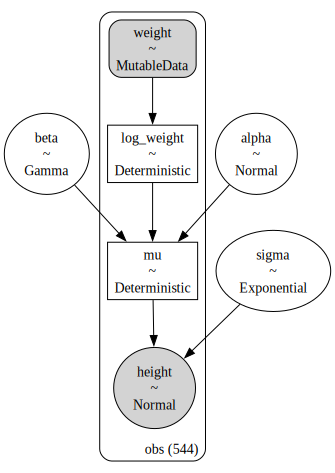

In [60]:
m_4h3.to_graphviz()

Plot priors

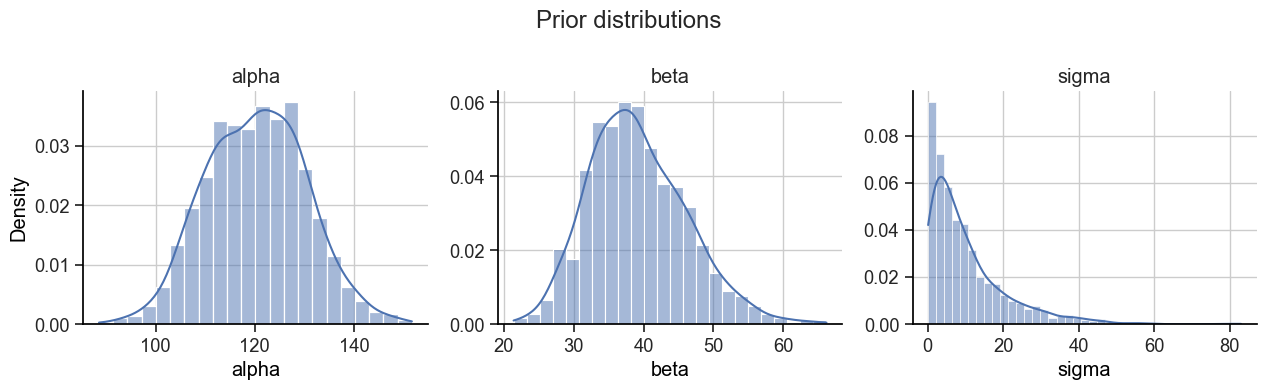

In [61]:
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))

params = ["alpha", "beta", "sigma"]
for param, ax in zip(params, axs):
    sns.histplot(trace_4h3.prior[param].sel(chain=0), stat="density", kde=True, ax=ax)
    ax.set(
        xlabel=param,
        ylabel=None,
        title=param,
    )

axs[0].set(ylabel="Density")
fig.suptitle("Prior distributions")
fig.tight_layout();

Plot sample lines

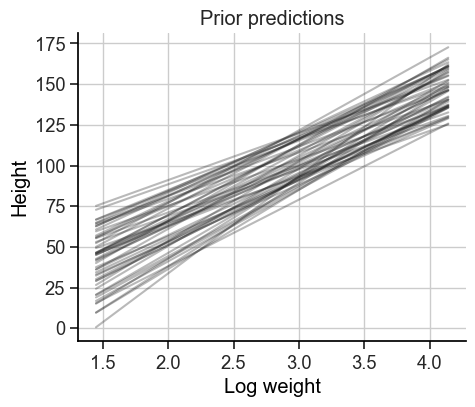

In [62]:
n_lines = 50

fig, ax = plt.subplots(figsize=(5, 4))

for draw in range(n_lines):
    ax.plot(
        trace_4h3.prior.log_weight.sel(chain=0, draw=0),
        trace_4h3.prior.mu.sel(chain=0, draw=draw),
        color="k",
        alpha=0.3,
    )

ax.set(
    xlabel="Log weight",
    ylabel="Height",
    title="Prior predictions",
);

Fit the model

In [63]:
draws = 1000
with m_4h3:
    trace_4h3 = pm.sample(draws=draws, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Summarise the posterior distributions

In [64]:
az.summary(
    trace_4h3,
    kind="stats",
    var_names=["~mu", "~log_weight"],
    hdi_prob=0.97,
    round_to=2,
)

mean    sd  hdi_1.5%  hdi_98.5%
alpha  138.25  0.22    137.75     138.70
beta    47.06  0.39     46.24      47.94
sigma    5.15  0.16      4.82       5.50

In [65]:
np.log(1.1) * 47

4.479578450803272

The mean of $\beta$ is 47 which implies that an increase in weight of 10% is associated with an increase of 4.5 units of height.

Now we plot the data against the MAP with HDIs. We need to sample the posterior predictive to get the HDI for height.

In [66]:
with m_4h3:
    trace_4h3 = pm.sample_posterior_predictive(
        trace_4h3,
        extend_inferencedata=True,
        random_seed=RANDOM_SEED,
    )

Sampling: [height]


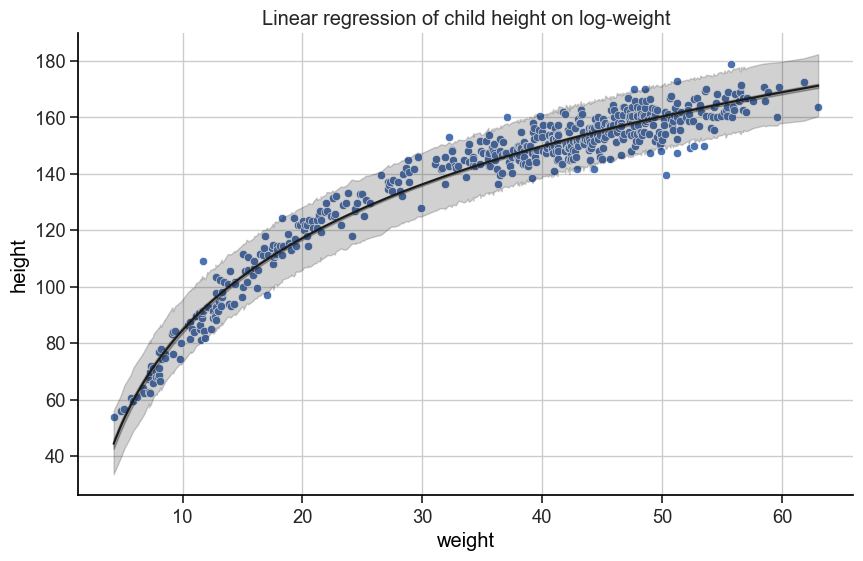

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

# true data
sns.scatterplot(
    x=trace_4h3.constant_data.weight, y=trace_4h3.observed_data.height, ax=ax
)

# plot MAP
ax.plot(
    trace_4h3.constant_data.weight,
    trace_4h3.posterior.mu.mean(dim=["draw", "chain"]),
    color="k",
)

# plot 97% HDI for MAP
mu_hdi = az.hdi(trace_4h3.posterior.mu, hdi_prob=0.97)
ax.fill_between(
    trace_4h3.constant_data.weight,
    mu_hdi.mu.sel(hdi="lower"),
    mu_hdi.mu.sel(hdi="higher"),
    color="k",
    alpha=0.3,
)

# plot 97% HDI for predicted heights
height_hdi = az.hdi(trace_4h3.posterior_predictive.height, hdi_prob=0.97)
ax.fill_between(
    trace_4h3.constant_data.weight,
    height_hdi.height.sel(hdi="lower"),
    height_hdi.height.sel(hdi="higher"),
    color="k",
    alpha=0.2,
)

ax.set(title="Linear regression of child height on log-weight");

### 4H4

Plot the prior predictive distribution for the parabolic polynomial regression model in the chapter. 
You can modify the code that plots the linear regression prior predictive distribution. 
Can you modify the prior distributions of $\alpha$, $\beta_1$, and $\beta_2$ so that the prior predictions stay within the biologically reasonable outcome space? 
That is to say: Do not try to fit the data by hand.
But do try to keep the curves consistent with what you know about height and weight, before seeing these exact data.

---

Start by recreating the original model.

In [68]:
# reload the data
howell = load_data(HOWELL_FILE, delimiter=";")

# standardise weight and add square feature
howell["weight_std"] = (howell["weight"] - howell["weight"].mean()) / howell[
    "weight"
].std()
howell["weight_std_sq"] = howell["weight_std"] ** 2

Now we define the model. Note that the coefficient $\beta_2$ of the square term has been changed to be negative.
This makes no difference for the default model since the prior is symmetric, but it will be useful when we want to force it to be negative.

In [69]:
def sample_parabolic_model_prior_predictive(
    howell,
    alpha_prior,
    alpha_kwargs,
    beta1_prior,
    beta1_kwargs,
    beta2_prior,
    beta2_kwargs,
    sigma_prior,
    sigma_kwargs,
):
    howell = howell.sort_values("weight")
    with pm.Model():
        # priors
        alpha = alpha_prior("alpha", **alpha_kwargs)
        beta1 = beta1_prior("beta1", **beta1_kwargs)
        beta2 = beta2_prior("beta2", **beta2_kwargs)
        sigma = sigma_prior("sigma", **sigma_kwargs)

        # data
        weight = pm.MutableData("weight", howell.weight, dims="obs")
        weight_std = pm.MutableData("weight_std", howell.weight_std, dims="obs")
        weight_std_sq = pm.MutableData(
            "weight_std_sq", howell.weight_std_sq, dims="obs"
        )

        # deterministic
        mu = pm.Deterministic(
            "mu", alpha + beta1 * weight_std - beta2 * weight_std_sq, dims="obs"
        )

        # observed
        height = pm.Normal(
            "height", mu=mu, sigma=sigma, observed=howell.height, dims="obs"
        )

        # sample prior predictive
        trace = pm.sample_prior_predictive(1000)

    return trace

In [70]:
trace_4_5 = sample_parabolic_model_prior_predictive(
    howell,
    pm.Normal,
    {"mu": 178, "sigma": 10},
    pm.LogNormal,
    {"mu": 0, "sigma": 1},
    pm.Normal,
    {"mu": 0, "sigma": 1},
    pm.Uniform,
    {"lower": 0, "upper": 50},
)

Sampling: [alpha, beta1, beta2, height, sigma]


Now we plot the priors and prior predictive lines together with a 97% HDI for the prior distribution.

In [71]:
def plot_prior_distributions(trace, params):
    n_params = len(params)
    ax_width = 4

    fig, axs = plt.subplots(ncols=n_params, figsize=(n_params * ax_width, 4))

    for param, ax in zip(params, axs):
        sns.histplot(trace.prior[param].sel(chain=0), stat="density", kde=True, ax=ax)
        ax.set(
            xlabel=param,
            ylabel=None,
            title=param,
        )

    axs[0].set(ylabel="Density")
    fig.suptitle("Prior distributions")

    return fig


def plot_prior_predictions(trace, n_lines=100):
    fig, ax = plt.subplots(figsize=(5, 4))

    for draw in range(n_lines):
        ax.plot(
            trace.constant_data.weight,
            trace.prior.mu.sel(chain=0, draw=draw),
            color="k",
            alpha=0.2,
        )

    # plot an HDI for prior predictions
    hdi = pm.hdi(trace.prior_predictive.height, hdi_prob=0.97)
    ax.fill_between(
        trace.constant_data.weight,
        hdi.height.sel(hdi="lower"),
        hdi.height.sel(hdi="higher"),
        color="k",
        alpha=0.1,
    )

    ax.set(
        xlabel="Weight",
        ylabel="Height",
        title="Prior predictions",
    )

    return fig

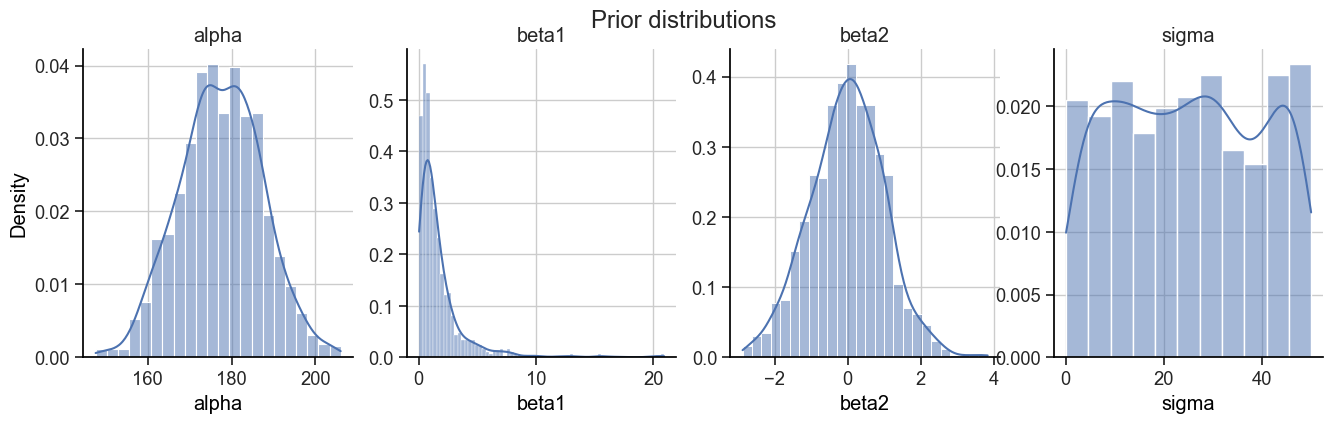

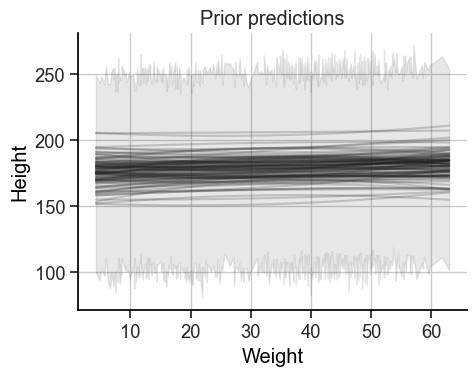

In [72]:
params = ["alpha", "beta1", "beta2", "sigma"]
plot_prior_distributions(trace_4_5, params)
plot_prior_predictions(trace_4_5)
plt.tight_layout()

This isn't very convincing - it's too flat, low values are much too low, and the HDI is much too wide.
To improve this we'll force $\beta_1$ and $\beta_2$ to be positive and make $\sigma$ exponential instead of uniform.

Sampling: [alpha, beta1, beta2, height, sigma]


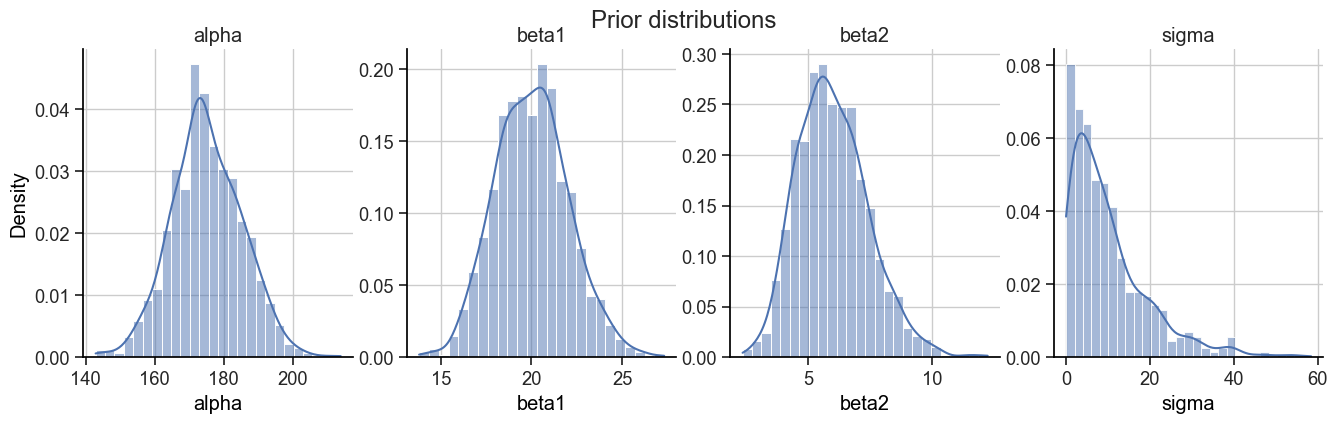

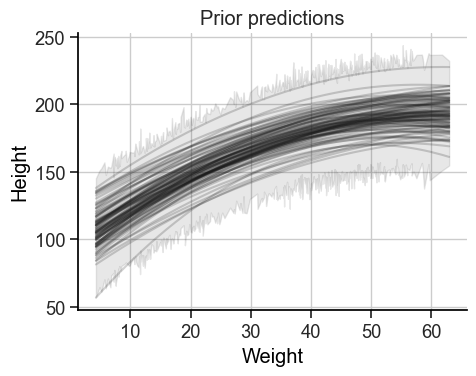

In [73]:
params = ["alpha", "beta1", "beta2", "sigma"]

trace = sample_parabolic_model_prior_predictive(
    howell,
    pm.Normal,
    {"mu": 175, "sigma": 10},
    pm.Gamma,
    {"alpha": 100, "beta": 5},
    pm.Gamma,
    {"alpha": 18, "beta": 3},
    pm.Exponential,
    {"lam": 0.1},
)
plot_prior_distributions(trace, params)
plot_prior_predictions(trace)
plt.tight_layout()

### 4H5

Return to `data(cherry_blossoms)` and model the association between blossom date (`doy`) and March temperature (`temp`).
Note that there are many missing values in both variables.
You may consider a linear model, a polynomial, or a spline on temperature.
How well does temperature trend predict the blossom trend?

---

First reload the data

In [74]:
cherry = load_data(CHERRY_BLOSSOMS_FILE)

# drop rows missing data
cherry = cherry.dropna(subset=["doy", "temp"])

Tidy it up

In [75]:
# normalise temperature
temp_scaler = StandardScaler()
cherry[["temp_std"]] = temp_scaler.fit_transform(cherry[["temp"]])

# add square feature
cherry["temp_std_sq"] = cherry["temp_std"] ** 2

cherry = cherry.sort_values("temp_std")

#### Quadratic Model

Let's start with a quadratic model.

In [76]:
coords = {"year": cherry.year}
with pm.Model(coords=coords) as m_4h5_quad:
    # data
    temp = pm.MutableData("temp", cherry.temp, dims="year")
    temp_std = pm.MutableData("temp_std", cherry.temp_std, dims="year")
    temp_std_sq = pm.MutableData("temp_std_sq", cherry.temp_std_sq, dims="year")

    # priors
    alpha = pm.Normal("alpha", mu=100, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=5)
    beta2 = pm.Normal("beta2", mu=0, sigma=5)
    sigma = pm.Exponential("sigma", lam=0.2)

    # linear model
    mu = pm.Deterministic(
        "mu", alpha + beta1 * temp_std + beta2 * temp_std_sq, dims="year"
    )

    # likelihood
    doy = pm.Normal("doy", mu=mu, sigma=sigma, observed=cherry.doy, dims="year")

    # sample prior predictive
    trace = pm.sample_prior_predictive()

Sampling: [alpha, beta1, beta2, doy, sigma]


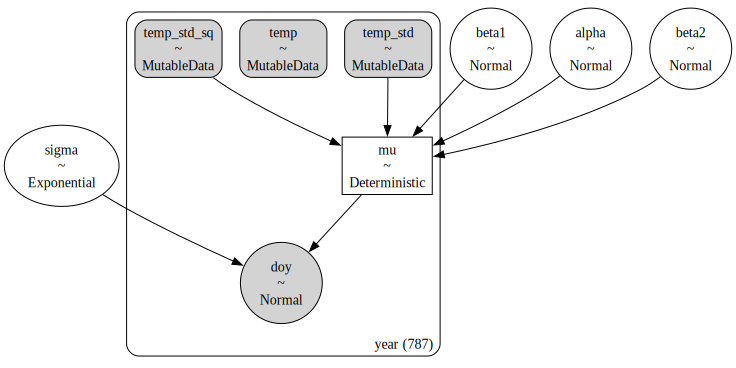

In [77]:
m_4h5_quad.to_graphviz()

Plot the priors

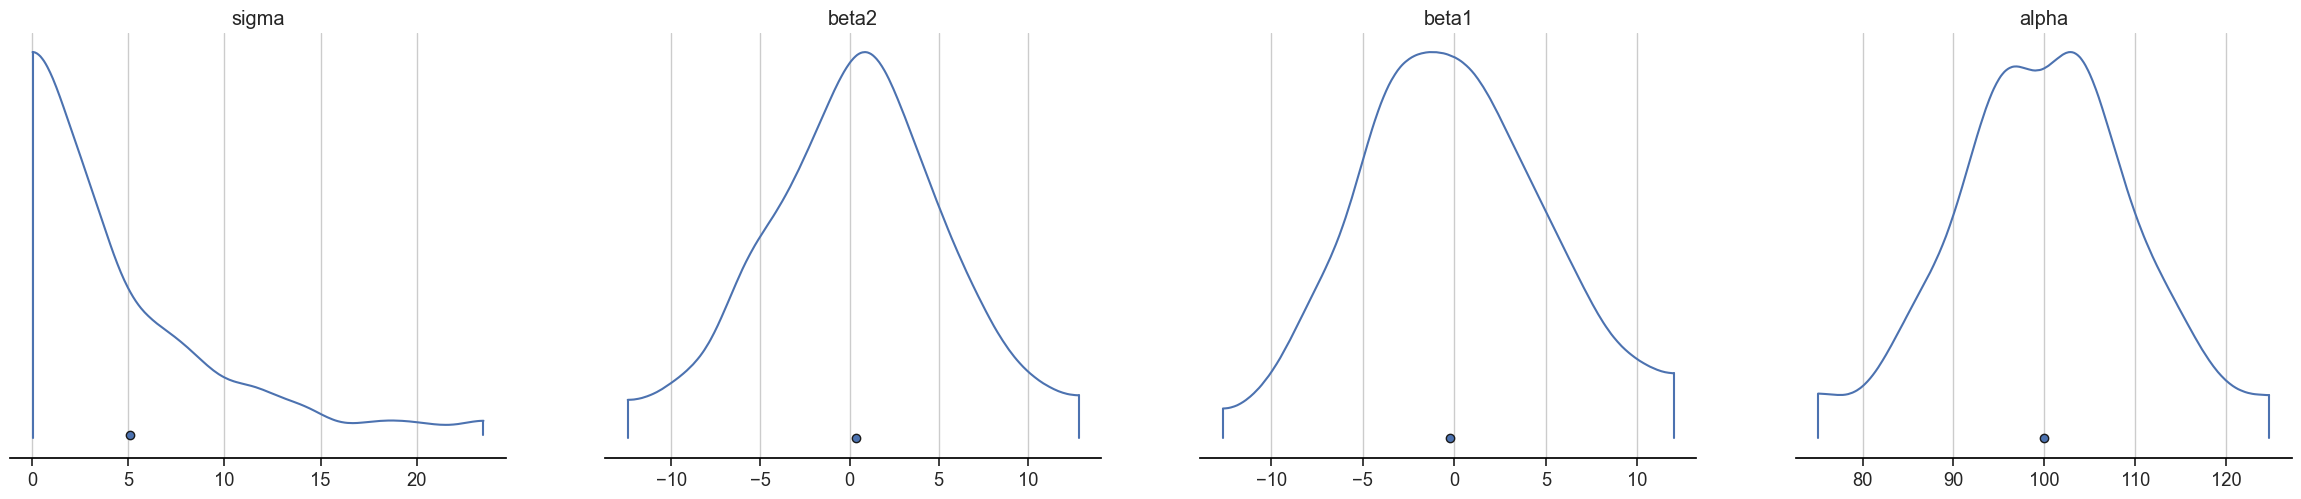

In [78]:
az.plot_density(
    trace,
    group="prior",
    var_names="~mu",
    filter_vars="regex",
    hdi_prob=0.99,
    grid=(1, 4),
);

What does this mean in terms of regression lines?

In [79]:
def plot_prior_predictive(trace, n_lines=50, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(
        trace.constant_data.temp,
        trace.prior.mu.isel(draw=slice(None, n_lines), chain=0).T,
        color="black",
        alpha=0.3,
    )

    doy_hdi = az.hdi(trace.prior_predictive.doy, hdi_prob=0.97)
    ax.fill_between(
        trace.constant_data.temp,
        doy_hdi.doy.sel(hdi="lower"),
        doy_hdi.doy.sel(hdi="higher"),
        color="black",
        alpha=0.1,
    )

    ax.set(
        xlabel="temp",
        ylabel="doy",
        title="Prior predictive",
    )

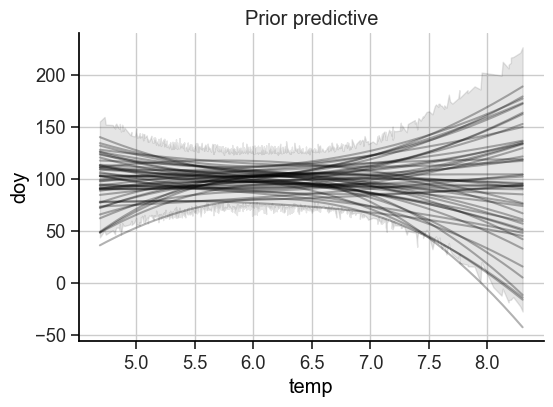

In [80]:
plot_prior_predictive(trace)

It's not great but it's good enough.
Let's fit the model.

In [81]:
with m_4h5_quad:
    trace_4h5_quad = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta1, beta2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [82]:
az.summary(
    trace_4h5_quad,
    kind="stats",
    var_names="~mu",
    filter_vars="regex",
    hdi_prob=0.89,
    round_to=2,
)

mean    sd  hdi_5.5%  hdi_94.5%
alpha  104.91  0.26    104.52     105.34
beta1   -2.04  0.23     -2.38      -1.65
beta2    0.01  0.15     -0.23       0.24
sigma    5.93  0.15      5.70       6.16

Interesting. Looks like the quadratic term has essentially no influence.

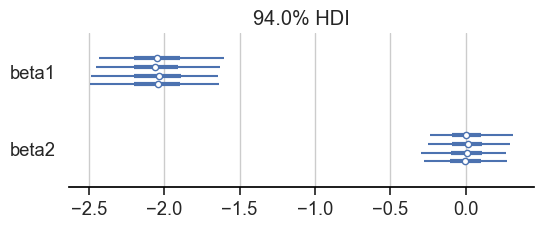

In [83]:
az.plot_forest(trace_4h5_quad, var_names=["beta"], filter_vars="regex", figsize=(6, 2));

Let's plot the posterior lines against the data

In [84]:
def plot_posterior(trace, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))

    # plot data
    sns.scatterplot(x=trace.constant_data.temp, y=trace.observed_data.doy, ax=ax)

    # plot mu
    ax.plot(
        trace.constant_data.temp,
        trace.posterior.mu.mean(dim=["draw", "chain"]),
        color="black",
    )

    # mu HDI
    mu_hdi = az.hdi(trace.posterior.mu, hdi_prob=0.89)
    ax.fill_between(
        trace.constant_data.temp,
        mu_hdi.mu.sel(hdi="lower"),
        mu_hdi.mu.sel(hdi="higher"),
        color="black",
        alpha=0.3,
    )

    ax.set(
        xlabel="temp",
        ylabel="doy",
        title="Posterior",
    )

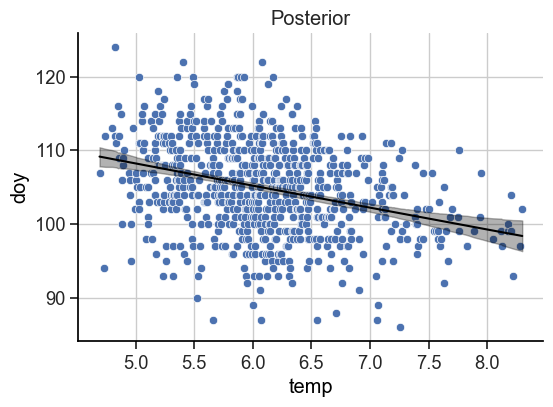

In [85]:
plot_posterior(trace_4h5_quad)

Clearly linear.

#### Spline Model

In [86]:
def generate_design_matrix(cherry, n_knots, deg):
    knots = np.quantile(cherry.temp, np.linspace(0, 1, n_knots))

    # add additional endpoint control knots - deg at each endpoint
    start_knots = np.array([cherry.temp.min()] * deg)
    end_knots = np.array([cherry.temp.max()] * deg)
    knots_ext = np.concatenate([start_knots, knots, end_knots])

    # this brings total knots to n_knots + 2 * deg, so we will have
    n_basis = n_knots + deg - 1

    # use arbitrary weights to start
    splines = BSpline(knots_ext, np.ones(n_basis), deg)

    # design matrix is basis splines evaluated at given points
    design_matrix = splines.design_matrix(
        cherry.temp, knots_ext, deg, extrapolate=True
    ).toarray()

    return design_matrix, knots

In [87]:
def define_spline_model(cherry, design_matrix):
    n_basis = design_matrix.shape[1]

    coords = {
        "year": cherry.year,
        "spline": range(n_basis),
    }
    with pm.Model(coords=coords) as model:
        # data
        temp = pm.MutableData("temp", cherry.temp, dims="year")
        # temp_std = pm.MutableData("temp_std", cherry.temp_std, dims="year")
        temp_splines = pm.MutableData(
            "temp_splines", design_matrix, dims=("year", "spline")
        )

        # priors
        alpha = pm.Normal("alpha", mu=100, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=5, dims="spline")
        sigma = pm.Exponential("sigma", lam=0.2)

        # model
        mu = pm.Deterministic("mu", alpha + temp_splines @ beta)

        # observed
        doy = pm.Normal("doy", mu=mu, sigma=sigma, observed=cherry.doy)

    return model

In [88]:
n_knots = 5
deg = 1
design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
m_4h5_spline = define_spline_model(cherry, design_matrix)

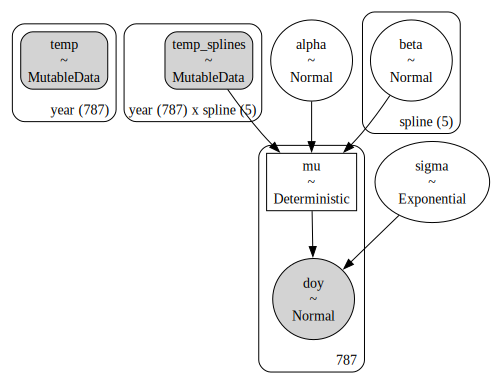

In [89]:
m_4h5_spline.to_graphviz()

In [90]:
with m_4h5_spline:
    # sample prior predictive
    trace = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

Sampling: [alpha, beta, doy, sigma]


What does this look like with the splines

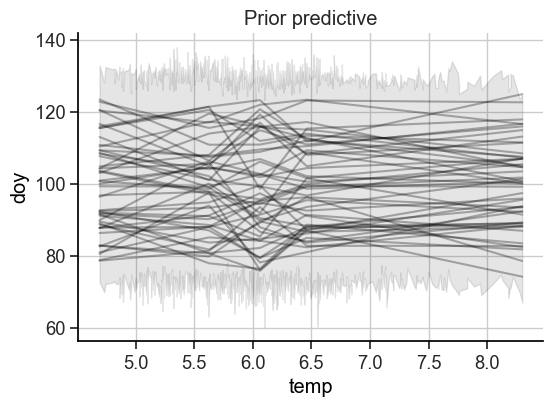

In [91]:
plot_prior_predictive(trace)

Now let's fit the model

In [92]:
with m_4h5_spline:
    # sample
    trace_4h5_spline = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [93]:
az.summary(
    trace_4h5_spline,
    kind="stats",
    var_names="~mu",
    filter_vars="regex",
    hdi_prob=0.89,
    round_to=2,
)

mean    sd  hdi_5.5%  hdi_94.5%
alpha    104.13  2.30    100.74     108.08
beta[0]    3.90  2.44     -0.12       7.67
beta[1]    2.92  2.38     -0.82       6.74
beta[2]    0.48  2.34     -3.49       3.97
beta[3]   -0.24  2.36     -3.94       3.52
beta[4]   -5.52  2.48     -9.79      -1.99
sigma      5.93  0.15      5.69       6.17

The standard deviations are pretty high.

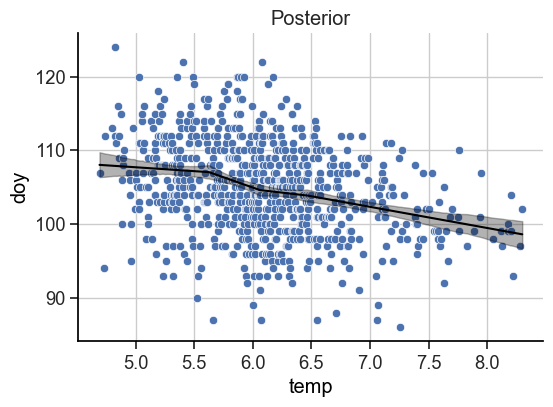

In [94]:
plot_posterior(trace_4h5_spline)

This doesn't really seem much different from the linear model.
Let's try it with more knots and a higher degree spline.

Sampling: [alpha, beta, doy, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


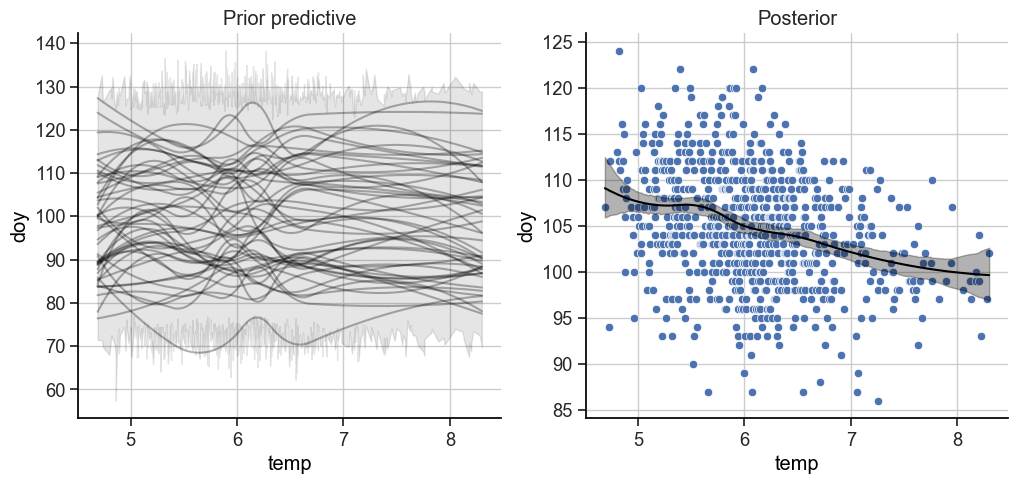

In [95]:
n_knots = 7
deg = 2
design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
model = define_spline_model(cherry, design_matrix)

with model:
    # sample prior predictive
    pp_trace = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

    # sample
    trace = pm.sample(random_seed=RANDOM_SEED)


fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

plot_prior_predictive(pp_trace, ax=axs[0])
plot_posterior(trace, ax=axs[1])

Doesn't look that much different.

#### Conclusion

There is some predictive power in March temperature.

In [96]:
beta1_mean = trace_4h5_quad.posterior.beta1.mean().item()
1 / np.sqrt(temp_scaler.var_) * beta1_mean

array([-2.99392995])

From the quadratic model (which is essentially linear) and increase of 1 degree in March temperature is associated with an average drop of 3 days in the date of the first blossoms.
But the standard deviation of the data from this trend line is around six, so there is a lot of variation in the data not captured by March temperature.

### 4H6

Simulate the prior predictive distribution for the cherry blossom spline in the chapter.
Adjust the prior on the weights and observe what happens.
What do you think the prior on the weights is doing?

---

In [97]:
# reload the data
cherry = load_data(CHERRY_BLOSSOMS_FILE)

# drop rows missing doy data
cherry = cherry.dropna(subset=["doy"])

# sort data
cherry = cherry.sort_values("year")

Reload some of the functions from the spline example

In [98]:
def generate_design_matrix(cherry, n_knots, deg):
    knots = np.quantile(cherry.year, np.linspace(0, 1, n_knots))

    # add additional endpoint control knots - deg at each endpoint
    start_knots = np.array([cherry.year.min()] * deg)
    end_knots = np.array([cherry.year.max()] * deg)
    knots_ext = np.concatenate([start_knots, knots, end_knots])

    # this brings total knots to n_knots + 2 * deg, so we will have
    n_basis = n_knots + deg - 1

    # use arbitrary weights to start
    splines = BSpline(knots_ext, np.ones(n_basis), deg)

    # design matrix is basis splines evaluated at given points
    design_matrix = splines.design_matrix(
        cherry.year, knots_ext, deg, extrapolate=True
    ).toarray()

    return design_matrix, knots

In [99]:
def define_spline_model(cherry, design_matrix, beta_kwargs):
    n_basis = design_matrix.shape[1]

    coords = {
        "spline": range(n_basis),
    }
    with pm.Model(coords=coords) as model:
        # priors
        alpha = pm.Normal("alpha", mu=100, sigma=10)
        beta = pm.Normal("beta", **beta_kwargs, dims="spline")
        sigma = pm.Exponential("sigma", lam=1)

        # data
        year = pm.MutableData("year", cherry.year, dims="obs")
        year_splines = pm.MutableData(
            "year_splines", design_matrix, dims=("obs", "spline")
        )

        # linear model
        mu = pm.Deterministic("mu", alpha + year_splines @ beta, dims="obs")

        # observed
        doy = pm.Normal("doy", mu=mu, sigma=sigma, observed=cherry.doy, dims="obs")

    return model

Now a function to plot the prior predictive.

In [100]:
def plot_prior_predictive(trace, n_lines=50, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(
        trace.constant_data.year,
        trace.prior.mu.isel(draw=slice(None, n_lines), chain=0).T,
        color="black",
        alpha=0.3,
    )

    doy_hdi = az.hdi(trace.prior_predictive.doy, hdi_prob=0.97)
    ax.fill_between(
        trace.constant_data.year,
        doy_hdi.doy.sel(hdi="lower"),
        doy_hdi.doy.sel(hdi="higher"),
        color="black",
        alpha=0.1,
    )

    ax.set(
        xlabel="year",
        ylabel="doy",
        title="Prior predictive",
    )

Putting everything together.

In [101]:
def define_spline_model_and_plot_prior_predictive(
    cherry, n_knots, deg, beta_kwargs, n_lines=50, ax=None
):
    design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
    model = define_spline_model(cherry, design_matrix, beta_kwargs)

    with model:
        pp_trace = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

    plot_prior_predictive(pp_trace, n_lines=n_lines, ax=ax)

Finally we plot the prior predictive for different values of the beta prior.

Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]
Sampling: [alpha, beta, doy, sigma]


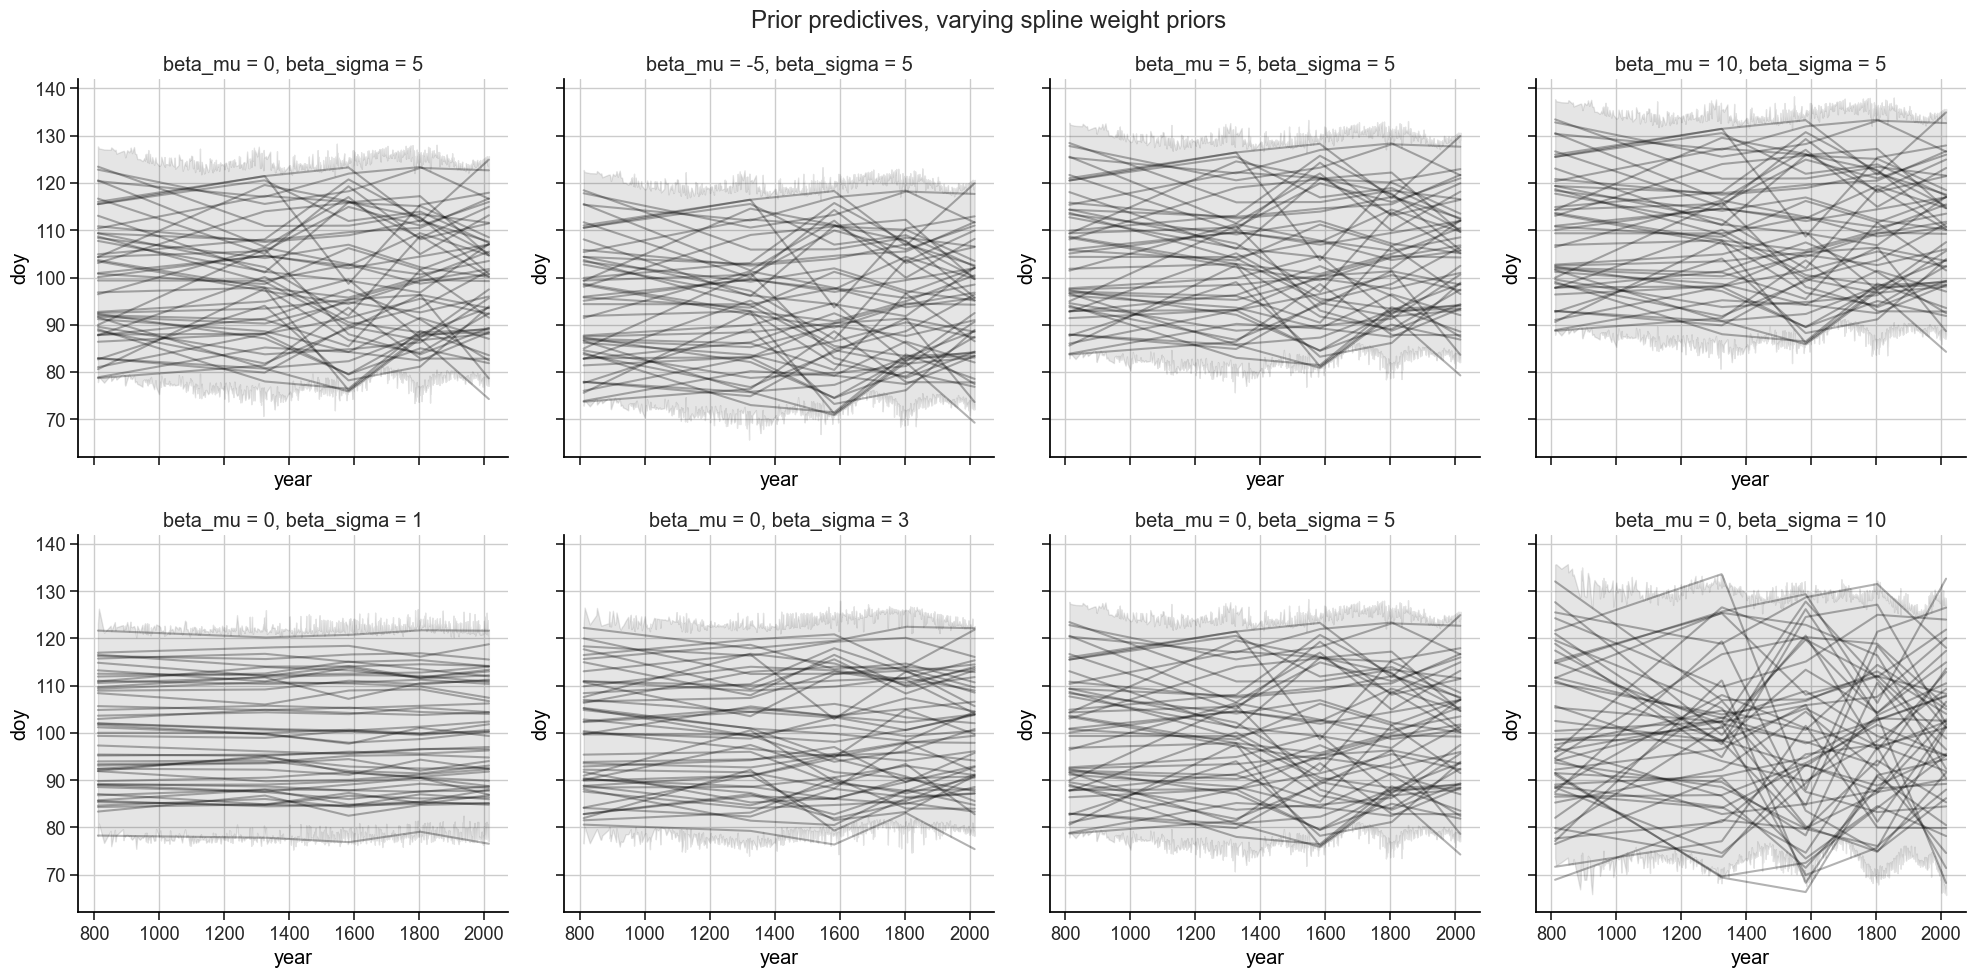

In [102]:
n_knots = 5
deg = 1

beta_mus = [0, -5, 5, 10]
beta_sigmas = [1, 3, 5, 10]

n_tests = len(beta_mus)
ax_width = 5
fig_width = ax_width * n_tests

fig, axs = plt.subplots(
    nrows=2, ncols=n_tests, sharex=True, sharey=True, figsize=(fig_width, 10)
)

for mu, ax in zip(beta_mus, axs[0, :]):
    beta_kwargs = {
        "mu": mu,
        "sigma": 5,
    }
    define_spline_model_and_plot_prior_predictive(
        cherry, n_knots, deg, beta_kwargs, ax=ax
    )
    ax.set_title(f"beta_mu = {mu}, beta_sigma = 5")

for sigma, ax in zip(beta_sigmas, axs[1, :]):
    beta_kwargs = {
        "mu": 0,
        "sigma": sigma,
    }
    define_spline_model_and_plot_prior_predictive(
        cherry, n_knots, deg, beta_kwargs, ax=ax
    )
    ax.set_title(f"beta_mu = 0, beta_sigma = {sigma}")

fig.suptitle("Prior predictives, varying spline weight priors")
fig.tight_layout();

We can see that changing the mean of the spline weight prior moves the splines up and down.
Changing the standard deviation affects how much the function can change between the knots.

### 4H8 (sic)

The cherry blossom spline in the chapter used an intercept $\alpha$, but technically it doesn’t require one.
The first basis functions could substitute for the intercept.
Try refitting the cherry blossom spline without the intercept.
What else about the model do you need to change to make this work?

---

In [103]:
# reload the data
cherry = load_data(CHERRY_BLOSSOMS_FILE)

# drop rows missing doy data
cherry = cherry.dropna(subset=["doy"])

# sort data
cherry = cherry.sort_values("year")

Reload some of the functions from the spline example

In [104]:
def generate_design_matrix(cherry, n_knots, deg):
    knots = np.quantile(cherry.year, np.linspace(0, 1, n_knots))

    # add additional endpoint control knots - deg at each endpoint
    start_knots = np.array([cherry.year.min()] * deg)
    end_knots = np.array([cherry.year.max()] * deg)
    knots_ext = np.concatenate([start_knots, knots, end_knots])

    # this brings total knots to n_knots + 2 * deg, so we will have
    n_basis = n_knots + deg - 1

    # use arbitrary weights to start
    splines = BSpline(knots_ext, np.ones(n_basis), deg)

    # design matrix is basis splines evaluated at given points
    design_matrix = splines.design_matrix(
        cherry.year, knots_ext, deg, extrapolate=True
    ).toarray()

    return design_matrix, knots

In [105]:
def define_spline_model(cherry, design_matrix, beta_kwargs, include_alpha=True):
    n_basis = design_matrix.shape[1]

    coords = {
        "spline": range(n_basis),
    }
    with pm.Model(coords=coords) as model:
        # priors
        if include_alpha:
            alpha = pm.Normal("alpha", mu=100, sigma=10)

        beta = pm.Normal("beta", **beta_kwargs, dims="spline")
        sigma = pm.Exponential("sigma", lam=1)

        # data
        year = pm.MutableData("year", cherry.year, dims="obs")
        year_splines = pm.MutableData(
            "year_splines", design_matrix, dims=("obs", "spline")
        )

        # linear model
        if include_alpha:
            mu = pm.Deterministic("mu", alpha + year_splines @ beta, dims="obs")
        else:
            mu = pm.Deterministic("mu", year_splines @ beta, dims="obs")

        # observed
        doy = pm.Normal("doy", mu=mu, sigma=sigma, observed=cherry.doy, dims="obs")

    return model

In [106]:
def plot_prior_predictive(trace, n_lines=50, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(
        trace.constant_data.year,
        trace.prior.mu.isel(draw=slice(None, n_lines), chain=0).T,
        color="black",
        alpha=0.3,
    )

    doy_hdi = az.hdi(trace.prior_predictive.doy, hdi_prob=0.97)
    ax.fill_between(
        trace.constant_data.year,
        doy_hdi.doy.sel(hdi="lower"),
        doy_hdi.doy.sel(hdi="higher"),
        color="black",
        alpha=0.1,
    )

    ax.set(
        xlabel="year",
        ylabel="doy",
        title="Prior predictive",
    )

First the original model

Sampling: [alpha, beta, doy, sigma]


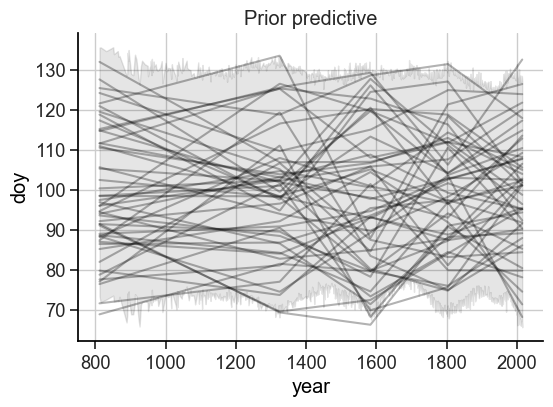

In [107]:
n_knots = 5
deg = 1
beta_kwargs = {
    "mu": 0,
    "sigma": 10,
}

design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
m_4h8a = define_spline_model(cherry, design_matrix, beta_kwargs, include_alpha=True)

with m_4h8a:
    pp_trace = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

plot_prior_predictive(pp_trace)

Now what if we drop alpha?
To get roughly the same prior predictive we need to translate the spline weight priors upward and increase their standard deviation.
Even then the distribution is not quite the same - the variation is greater around the knots than between them.

Sampling: [beta, doy, sigma]


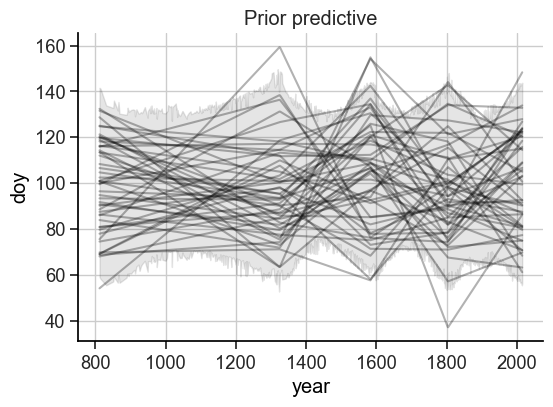

In [108]:
n_knots = 5
deg = 1
beta_kwargs = {
    "mu": 100,
    "sigma": 20,
}

design_matrix, knots = generate_design_matrix(cherry, n_knots, deg)
m_4h8b = define_spline_model(cherry, design_matrix, beta_kwargs, include_alpha=False)

with m_4h8b:
    pp_trace = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

plot_prior_predictive(pp_trace)

Let's fit both models

In [109]:
with m_4h8a:
    trace_4h8a = pm.sample(random_seed=RANDOM_SEED)

with m_4h8b:
    trace_4h8b = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Let's compare the posterior distributions in the two models.

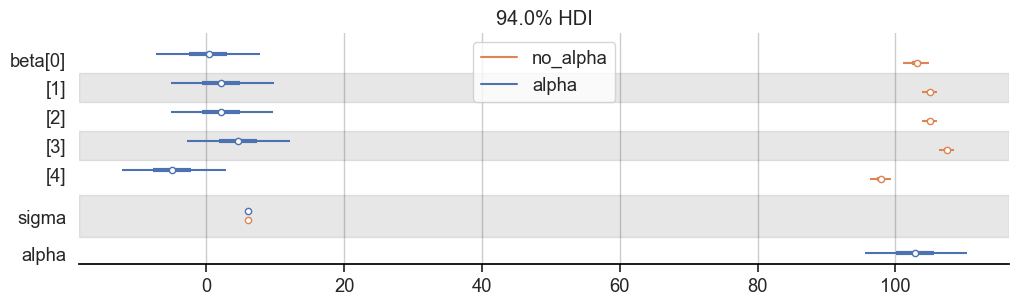

In [110]:
az.plot_forest(
    [trace_4h8a, trace_4h8b],
    model_names=["alpha", "no_alpha"],
    var_names=["~mu"],
    filter_vars="regex",
    combined=True,
    figsize=(12, 3),
);

The spline weight posteriors for the model without a constant parameter are shifted up as expected.
More interestingly they are also much tighter, presumably because $\alpha$ is redundant.
That is, in the model with a constant parameter, it is equally likely that $\alpha$ is slightly higher and all the spline weights are a little lower or $\alpha$ is a little lower than the spline weights are higher.
I wonder what different this makes to the posterior predictive.

In [111]:
with m_4h8a:
    trace_4h8a = pm.sample_posterior_predictive(
        trace_4h8a, extend_inferencedata=True, random_seed=RANDOM_SEED
    )

with m_4h8b:
    trace_4h8b = pm.sample_posterior_predictive(
        trace_4h8b, extend_inferencedata=True, random_seed=RANDOM_SEED
    )

Sampling: [doy]


Sampling: [doy]


In [112]:
def plot_posterior(trace, hdi_prob=0.89, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))

    # plot data
    sns.scatterplot(
        x=trace.constant_data.year,
        y=trace.observed_data.doy,
        ax=ax,
    )

    # plot mu
    ax.plot(
        trace.constant_data.year,
        trace.posterior.mu.mean(dim=["draw", "chain"]),
        color="black",
    )

    # mu HDI
    mu_hdi = az.hdi(trace.posterior.mu, hdi_prob=hdi_prob)
    ax.fill_between(
        trace.constant_data.year,
        mu_hdi.mu.sel(hdi="lower"),
        mu_hdi.mu.sel(hdi="higher"),
        color="black",
        alpha=0.3,
    )

    # posterior predictive HDI
    doy_hdi = az.hdi(trace.posterior_predictive.doy, hdi_prob=hdi_prob)
    ax.fill_between(
        trace.constant_data.year,
        doy_hdi.doy.sel(hdi="lower"),
        doy_hdi.doy.sel(hdi="higher"),
        color="black",
        alpha=0.1,
    )

    ax.set(
        xlabel="year",
        ylabel="doy",
        title="Posterior",
    )

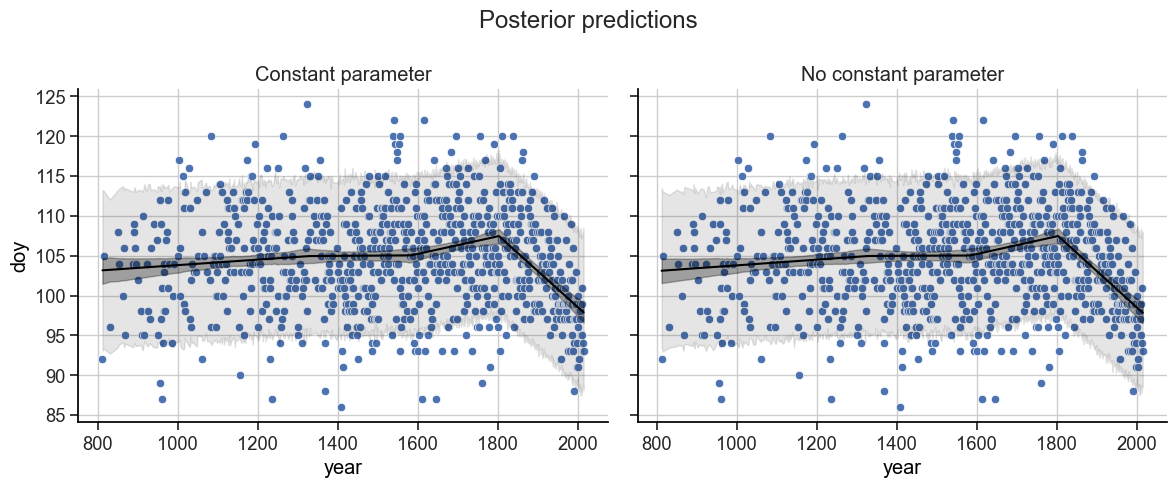

In [113]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

plot_posterior(trace_4h8a, ax=axs[0])
plot_posterior(trace_4h8b, ax=axs[1])

axs[0].set_title("Constant parameter")
axs[1].set_title("No constant parameter")

fig.suptitle("Posterior predictions")
fig.tight_layout()

It looks like, though the marginal parameter distributions are much wider with a constant parameter, the joint distribution (expressed through the linear model) isn't actually any wider.
Although it doesn't make any difference to the eventual predictions, I think that the model without the constant parameter should be preferred as the marginal posteriors are much easier to interpret.
Even better we could start by centring the `doy` values, completely removing any need for $\alpha$.